# Transactions Fraud Detection

**Authors:** Peter Macinec, Timotej Zatko

## Model selection

### Setup and reading the data

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from src.dataset import load_processed_data
from src.evaluation import custom_classification_report

In [3]:
x_train, y_train, x_test, y_test = load_processed_data()

In [4]:
# temp solution, train on smaller size (for performance issues)

x_train = x_train[:100000]
y_train = y_train[:100000]

### Train DecisionTreeClassifier

In [5]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

CPU times: user 17.8 s, sys: 15.6 ms, total: 17.8 s
Wall time: 17.8 s


not fraud
precision: 0.9776403843113836
recall: 0.9795674134562926
f1-score: 0.9786029502259261
support: 113642


is fraud
precision: 0.4526166902404526
recall: 0.4299149126735334
f1-score: 0.44097381717960493
support: 4466


accuracy: 0.958783486300674


macro avg
precision: 0.7151285372759181
recall: 0.704741163064913
f1-score: 0.7097883837027655
support: 118108


weighted avg
precision: 0.9577877425113295
recall: 0.958783486300674
f1-score: 0.9582736608620822
support: 118108


CPU times: user 1.28 s, sys: 269 ms, total: 1.54 s
Wall time: 1.84 s


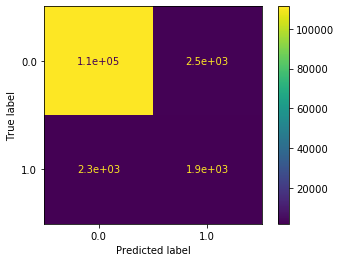

In [6]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train LogisticRegressionCV

In [10]:
%%time

clf = LogisticRegressionCV()
clf = clf.fit(x_train, y_train)

CPU times: user 3min 39s, sys: 51.6 s, total: 4min 30s
Wall time: 1min 9s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


not fraud
precision: 0.9996311453814133
recall: 0.9641036065795938
f1-score: 0.9815459970335622
support: 118062


is fraud
precision: 0.000942951438000943
recall: 0.08695652173913043
f1-score: 0.001865671641791045
support: 46


accuracy: 0.9637619805601653


macro avg
precision: 0.5002870484097072
recall: 0.5255300641593621
f1-score: 0.4917058343376766
support: 118108


weighted avg
precision: 0.9992421822551103
recall: 0.9637619805601653
f1-score: 0.9811644369786292
support: 118108


CPU times: user 1.22 s, sys: 550 ms, total: 1.77 s
Wall time: 1.14 s


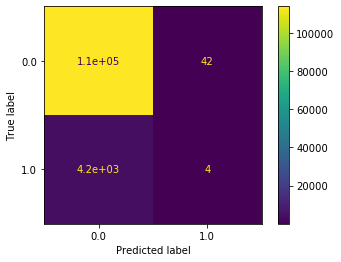

In [11]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train LinearSVC

In [13]:
%%time

clf = LinearSVC()
clf = clf.fit(x_train, y_train)

CPU times: user 1min 31s, sys: 0 ns, total: 1min 31s
Wall time: 1min 31s


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


not fraud
precision: 1.0
recall: 0.9640837199850983
f1-score: 0.9817134678886428
support: 118108


is fraud
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


accuracy: 0.9640837199850983


macro avg
precision: 0.5
recall: 0.48204185999254917
f1-score: 0.4908567339443214
support: 118108


weighted avg
precision: 1.0
recall: 0.9640837199850983
f1-score: 0.9817134678886428
support: 118108


CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 899 ms


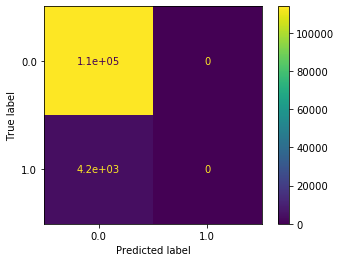

In [14]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train GaussianNB

In [15]:
%%time

clf = GaussianNB()
clf = clf.fit(x_train, y_train)

CPU times: user 882 ms, sys: 0 ns, total: 882 ms
Wall time: 882 ms


not fraud
precision: 0.017538158888518084
recall: 0.9118721461187215
f1-score: 0.03441442062452609
support: 2190


is fraud
precision: 0.9545025931164545
recall: 0.034929864214358425
f1-score: 0.06739347536617843
support: 115918


accuracy: 0.05119043587225251


macro avg
precision: 0.48602037600248627
recall: 0.47340100516653993
f1-score: 0.050903947995352264
support: 118108


weighted avg
precision: 0.9371290696382889
recall: 0.05119043587225251
f1-score: 0.06678196615525098
support: 118108


CPU times: user 2.85 s, sys: 0 ns, total: 2.85 s
Wall time: 2.86 s


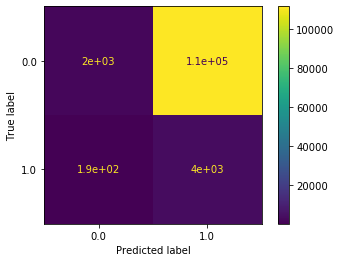

In [16]:
%%time

custom_classification_report(clf, x_test, y_test)